<a href="https://colab.research.google.com/github/jigarsiddhpura/Superstore_Marketing_Campaign_Prediction/blob/main/Superstore_Marketing_Campaign_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [149]:
import pandas as pd,numpy as np
import seaborn as sns,matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns',None)
# sns.set_theme(color_codes=True)

### Data Processing Part 1

In [150]:
df = pd.read_csv('/content/gdrive/MyDrive/ML-PROJECTS/Superstore Marketing Campaign Prediction/superstore_data.csv')
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


In [151]:
df.shape

(2240, 22)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [153]:
df.drop(columns='Id',inplace=True)

In [154]:
# check the no. of unique values in the object datatype
df.select_dtypes(include='object').nunique()

Education           5
Marital_Status      8
Dt_Customer       663
dtype: int64

In [155]:
# Extracting last 4 digits from 'Dt_Customer' column
df['Dt_Customer'] = df['Dt_Customer'].str[-4:]

In [156]:
# check the no. of unique values in the object datatype
df.select_dtypes(include='object').nunique()

Education         5
Marital_Status    8
Dt_Customer       3
dtype: int64

In [157]:
df.nunique()

Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer               3
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
Response                  2
Complain                  2
dtype: int64

### EDA

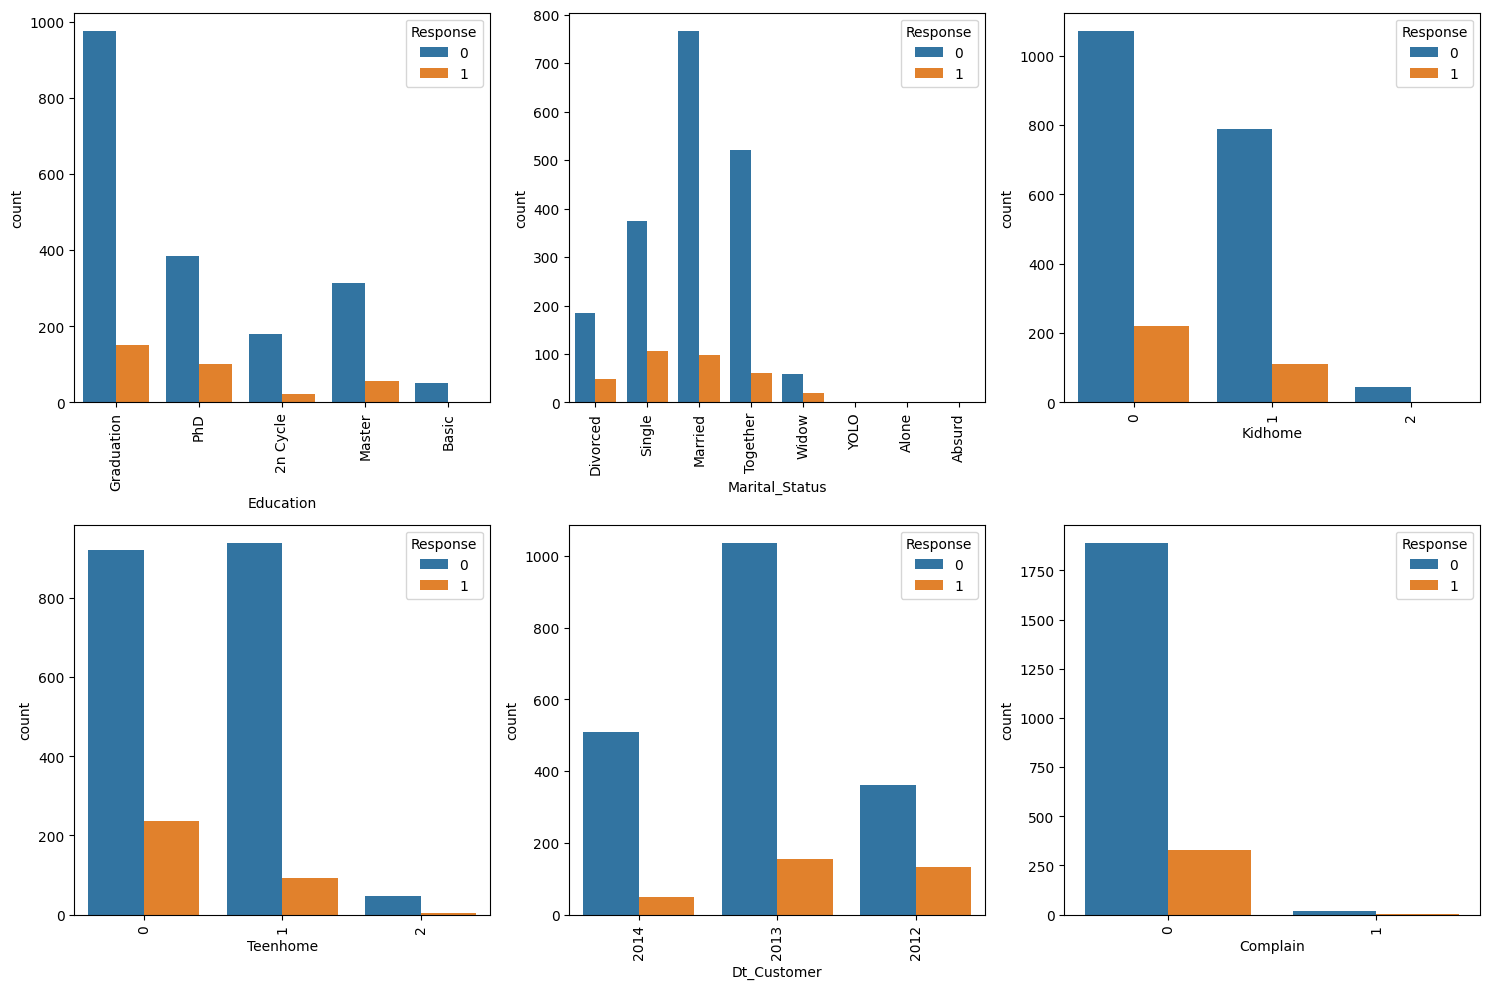

In [158]:
# categorical vars to plot
cat_var = ['Education','Marital_Status','Kidhome','Teenhome','Dt_Customer','Complain']

# creating figure with subplots
fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(15,10))
axs = axs.flatten()

# creating barplot for each categorical variable
for i,var in enumerate(cat_var):
  sns.countplot(data=df,x=var,hue='Response',ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
  
# adjust spaces btw subplots
fig.tight_layout()
plt.show()




<ipython-input-159-ff1fe148301e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-159-ff1fe148301e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-159-ff1fe148301e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)


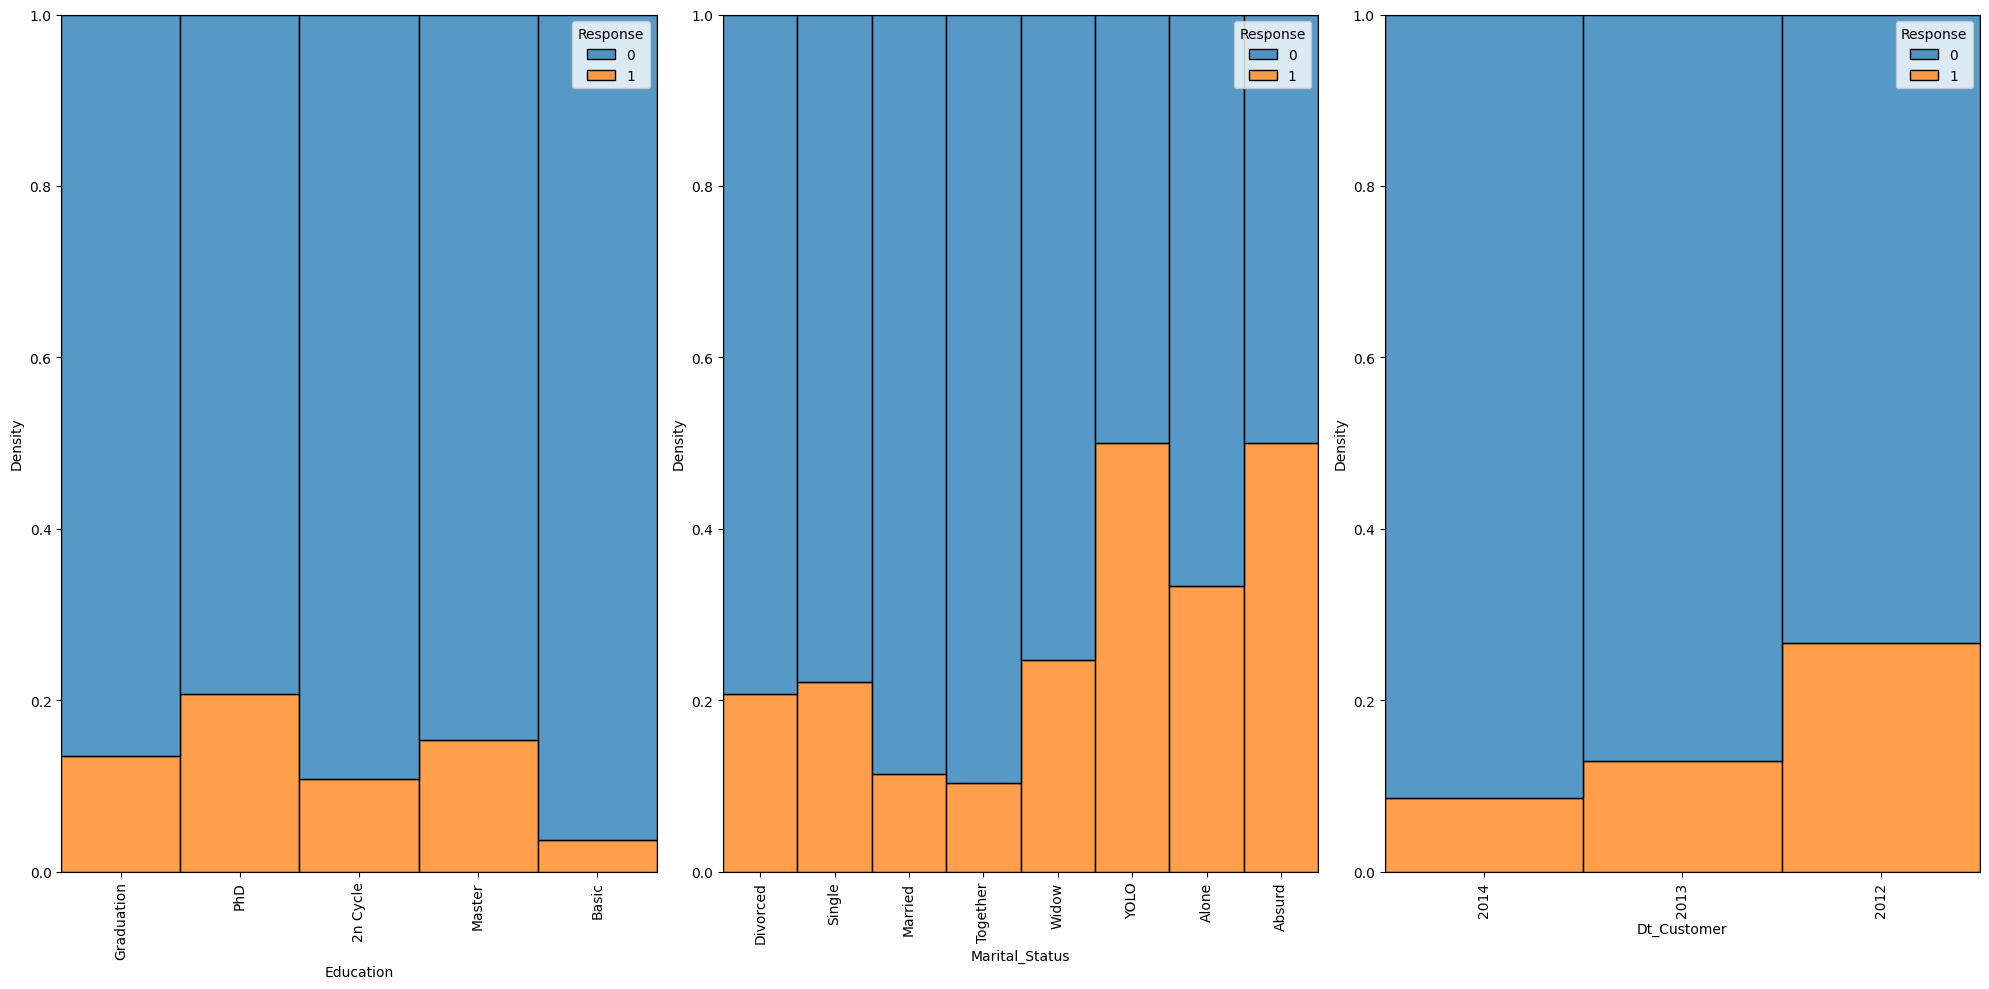

In [159]:
# categorical vars to plot
cat_var = ['Education','Marital_Status','Dt_Customer']

# creating figure with subplots
fig,axs = plt.subplots(ncols=3,figsize=(20,10))
# axs = axs.flatten()

# creating barplot for each categorical variable
for i,var in enumerate(cat_var):
  sns.histplot(data=df,x=var,hue='Response',ax=axs[i],stat='density',multiple='fill')
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
  
# adjust spaces btw subplots
fig.tight_layout()
plt.show()



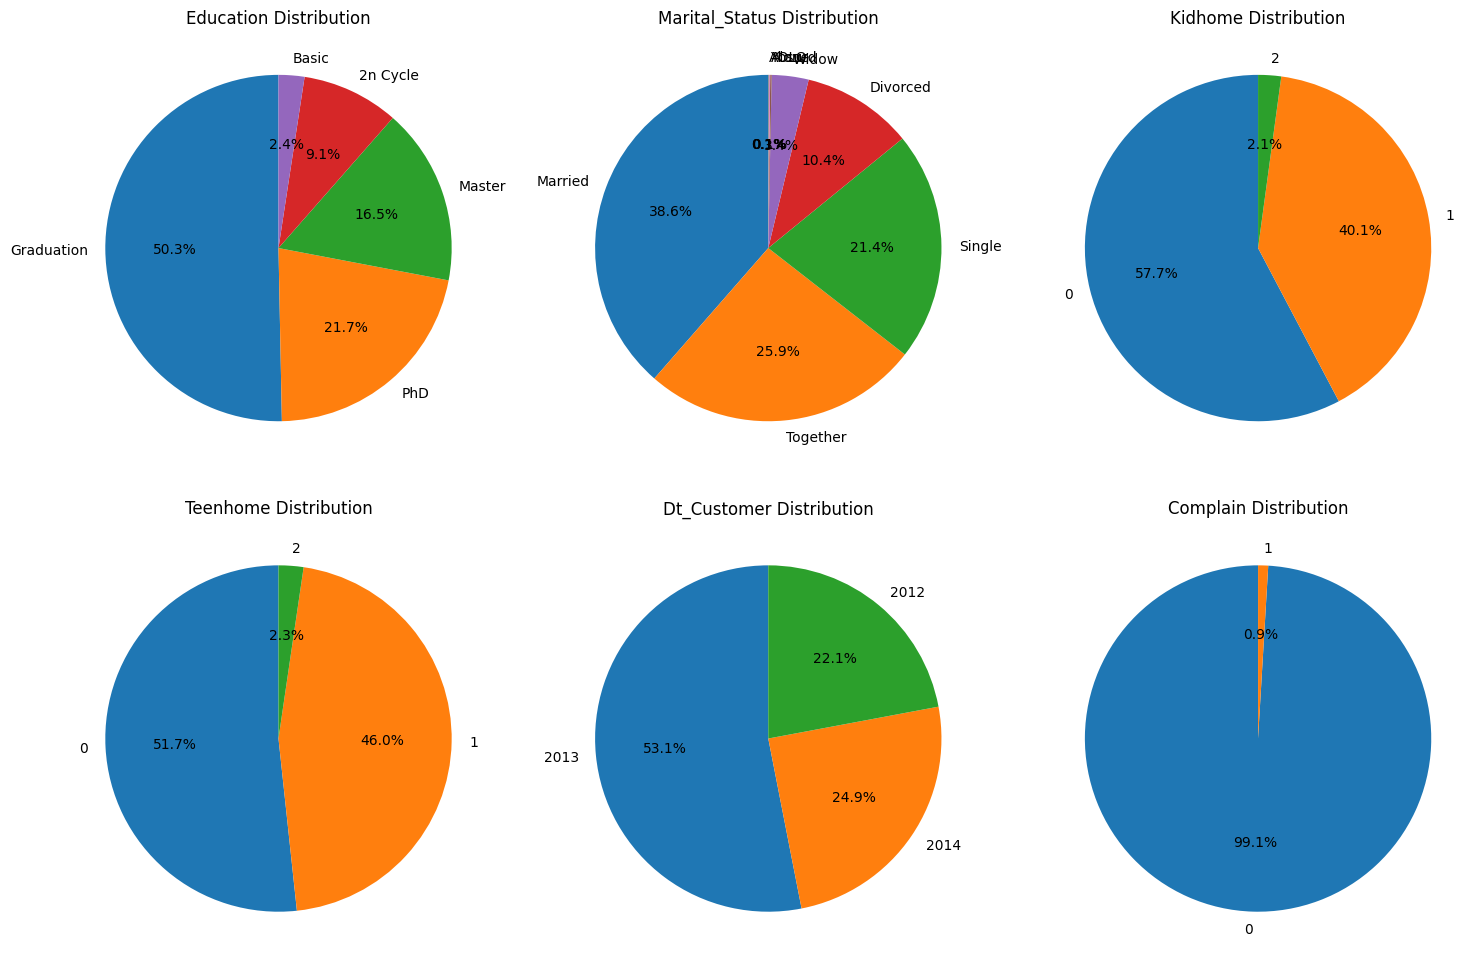

In [160]:
# categorical vars to plot
cat_var = ['Education','Marital_Status','Kidhome','Teenhome','Dt_Customer','Complain']

# creating figure with subplots
fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(15,10))

# creating barplot for each categorical variable
for i,var in enumerate(cat_var):

    # count the no. of occurences for each category
    cat_counts = df[var].value_counts()

    axs.flat[i].pie(cat_counts,labels=cat_counts.index,autopct='%0.1f%%',startangle=90)
    # print(f'{cat_count}')

    #set a title for each subplt
    axs.flat[i].set_title(f'{var} Distribution')
  
# adjust spaces btw subplots
fig.tight_layout()

plt.show()



**Inferences from above plots**


*   *Singles* are the one with most positive responses
*   Number of positive responses decrease from the *2012-2014*
*   No. of Kids/teens is inversely proportional to positive responses





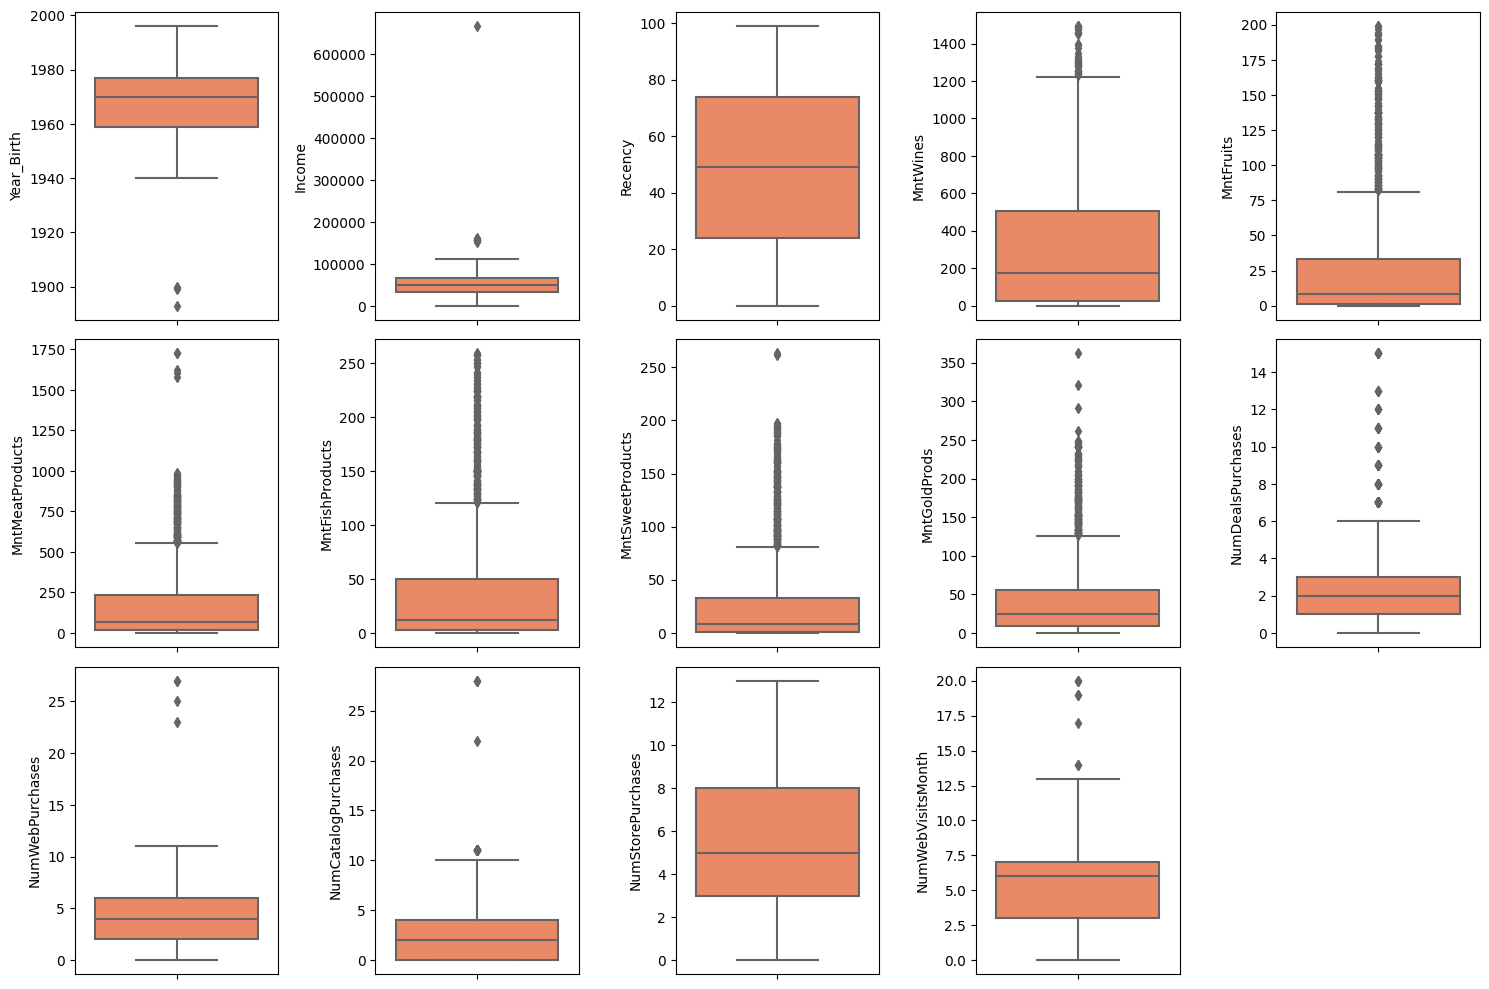

In [161]:
num_vars = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
           'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
           'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig,axs = plt.subplots(nrows=3,ncols=5,figsize=(15,10))
axs = axs.flatten()

for i,var in enumerate(num_vars):
  sns.boxplot(y=var,ax=axs[i],data=df,color='coral')

# removing the 15th subplot
fig.delaxes(axs[14])

plt.tight_layout()
plt.show()


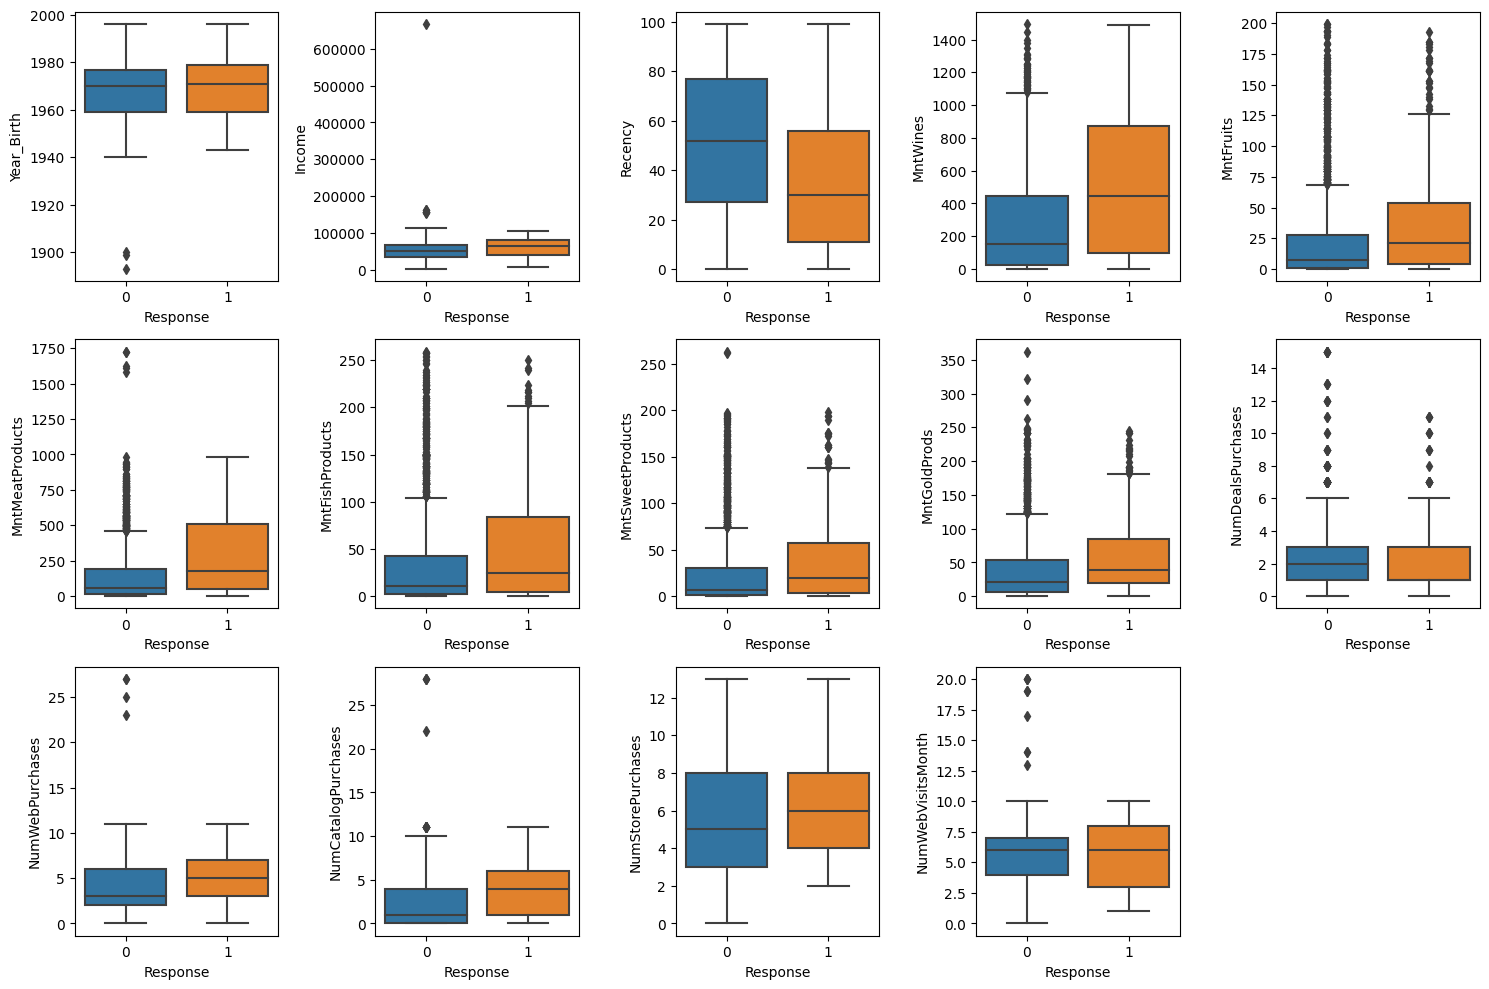

In [162]:
num_vars = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
           'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
           'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig,axs = plt.subplots(nrows=3,ncols=5,figsize=(15,10))
axs = axs.flatten()

for i,var in enumerate(num_vars):
  sns.boxplot(y=var,ax=axs[i],data=df,x='Response')

# removing the 15th subplot
fig.delaxes(axs[14])

plt.tight_layout()
plt.show()


<ipython-input-163-1241ba8a1c0b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-163-1241ba8a1c0b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-163-1241ba8a1c0b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-163-1241ba8a1c0b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-163-1241ba8a1c0b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-163-1241ba8a1c0b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_

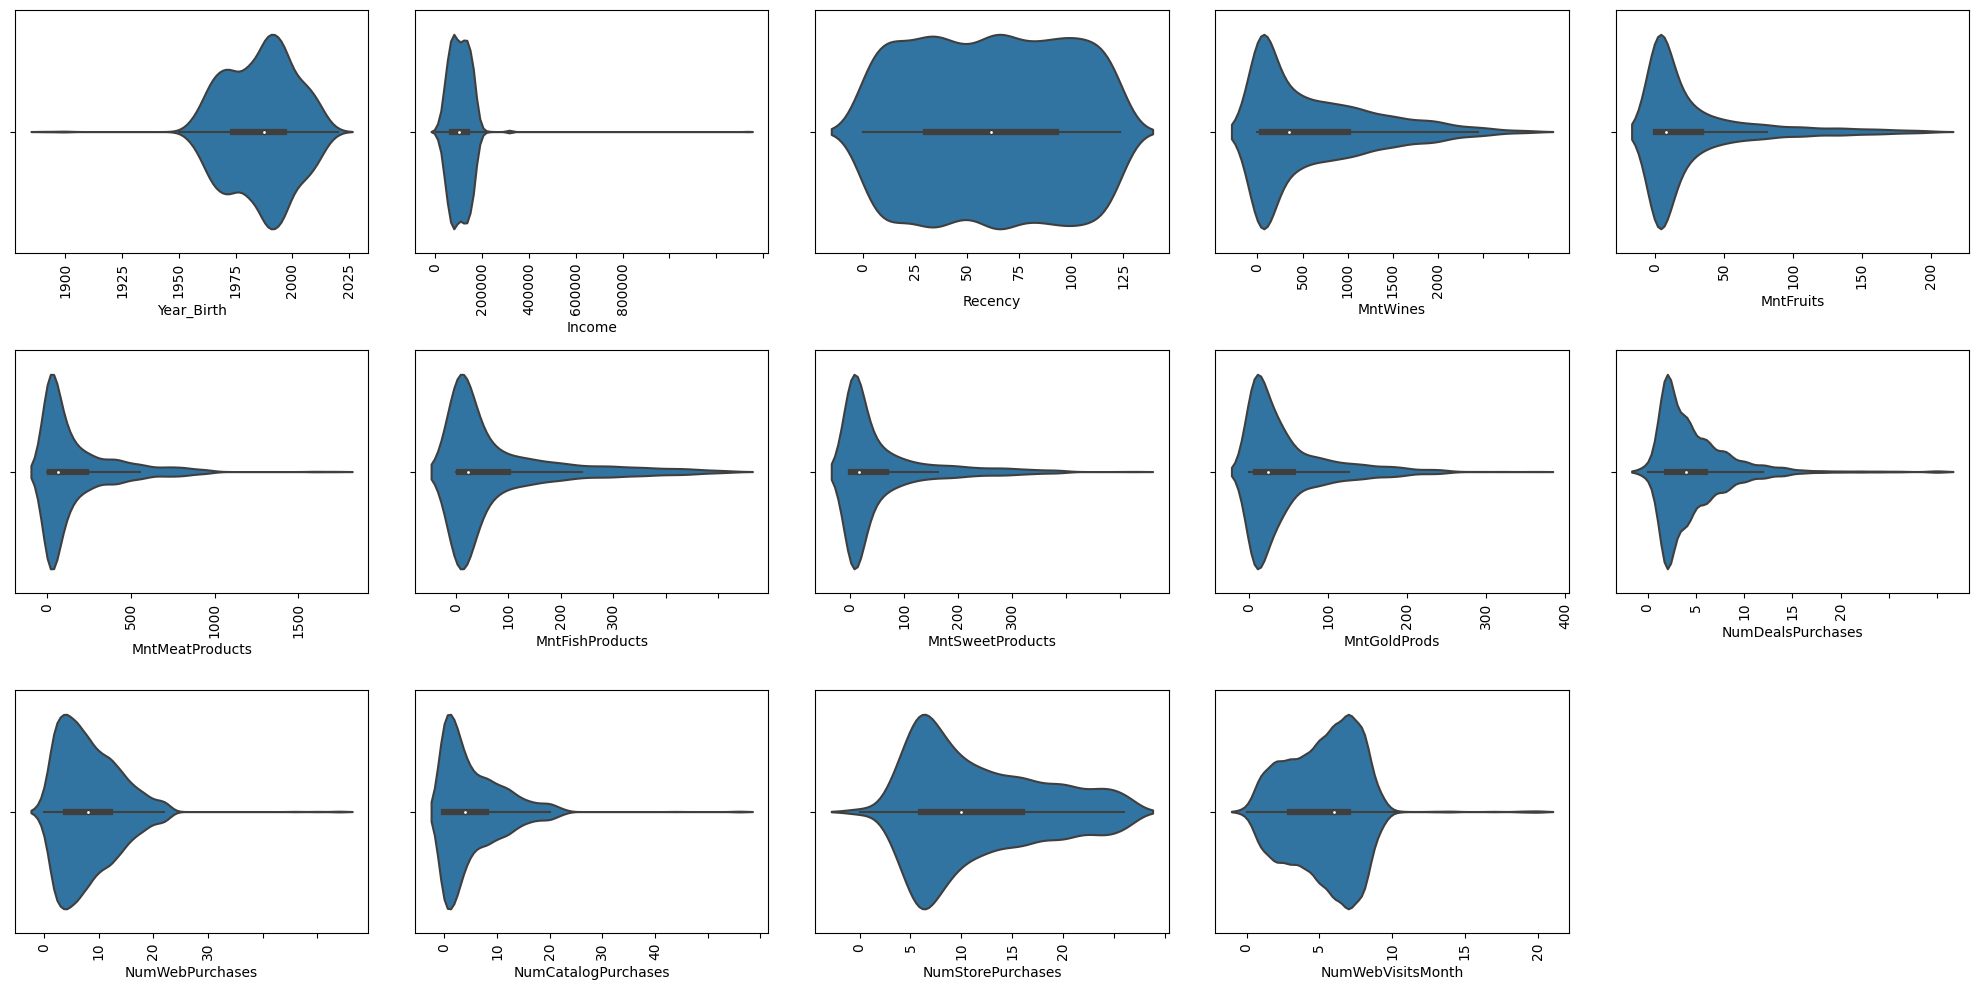

In [163]:
num_vars = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
           'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
           'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)

fig.tight_layout()

# remove the 15th subplot
fig.delaxes(axs[14])

plt.show()

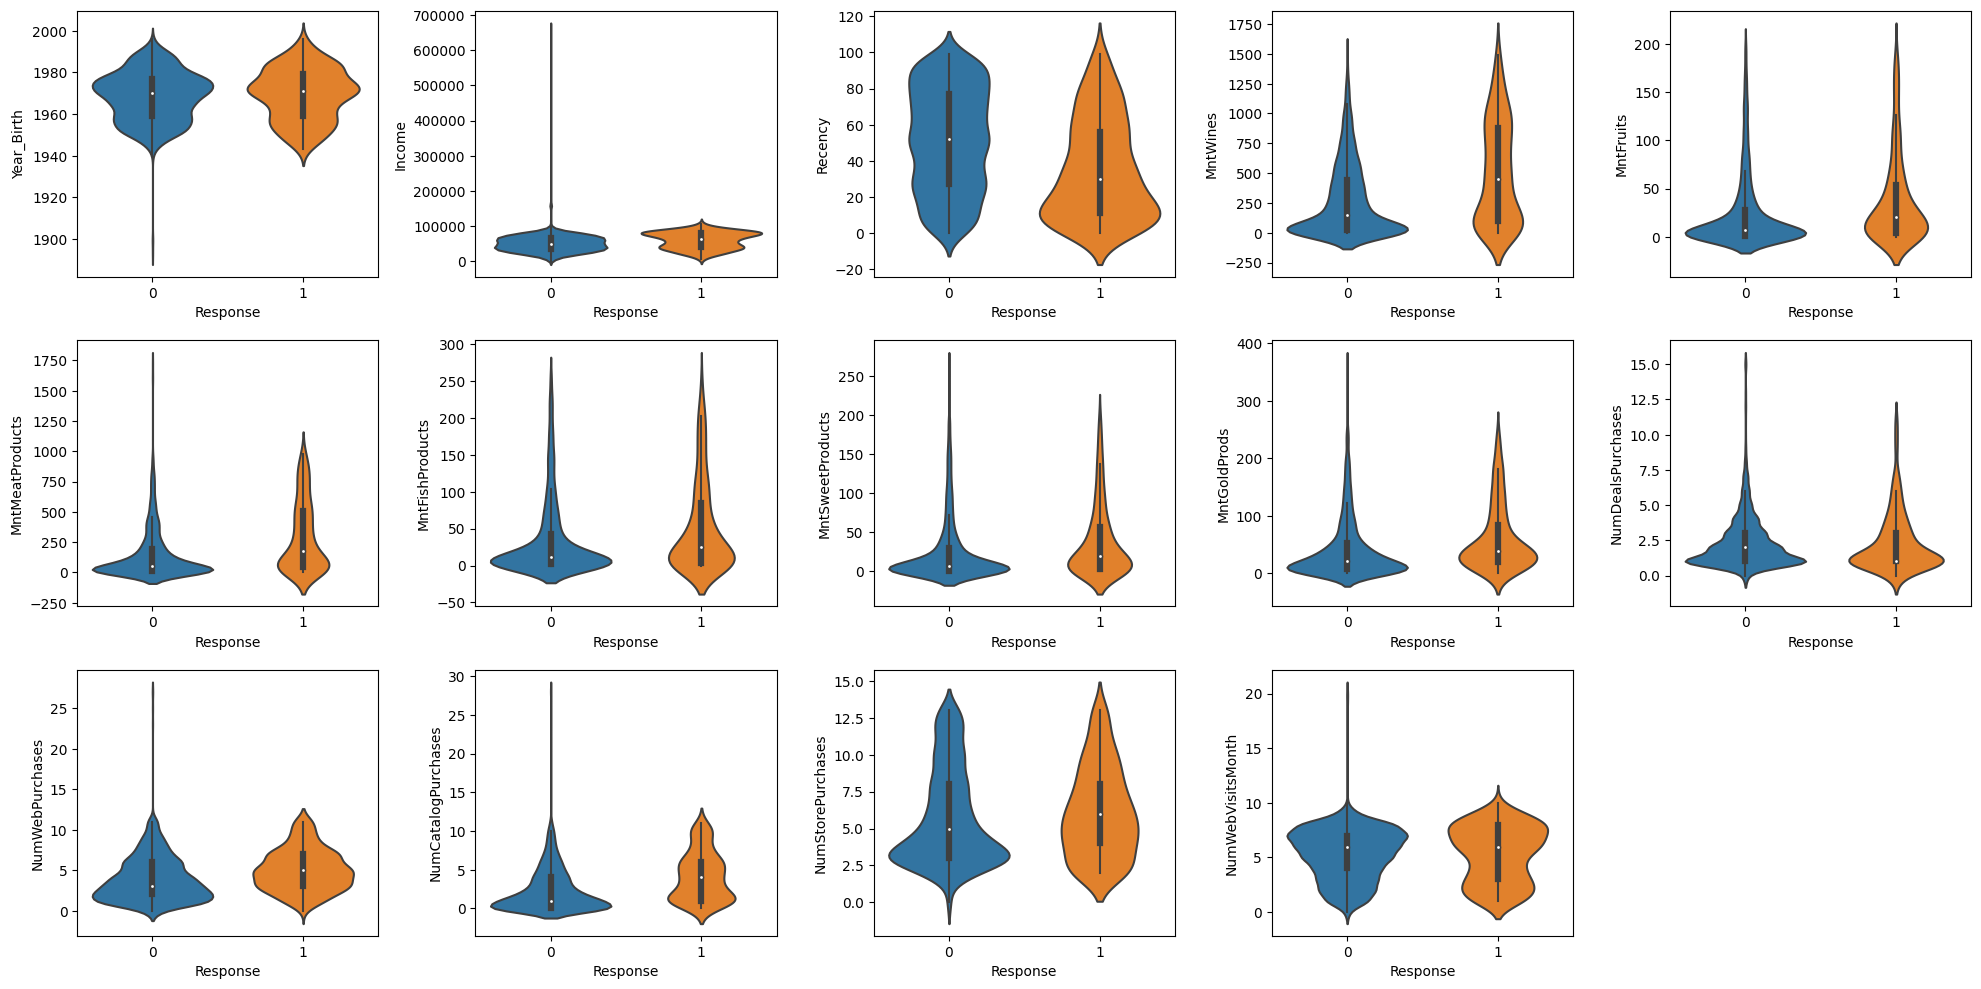

In [164]:
num_vars = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
           'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
           'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(y=var, data=df, ax=axs[i],x='Response')

fig.tight_layout()

# remove the 15th subplot
fig.delaxes(axs[14])

plt.show()

### Data pre-processing part 2

In [165]:
missing = df.isnull().sum() * 100 / len(df.values)
missing[missing > 0].sort_values(ascending=False)

Income    1.071429
dtype: float64

In [166]:
# income is normally distributed , we fill it with mean values
df['Income'].fillna(df['Income'].mean(),inplace=True)

In [167]:
# drop complain column bcz it is very unbalanced
df.drop(columns='Complain',inplace=True)
df.shape

(2240, 20)

In [168]:
# removing Dt_Customer bcz its irrelevant for prediction
df.drop(columns='Dt_Customer',inplace=True)

### Label Encoding (for each Object datatype)

In [169]:
df['Marital_Status'] = df['Marital_Status'].replace(['YOLO','Alone'],'Single')
df['Marital_Status'] = df['Marital_Status'].replace(['Together'],'Married')

In [170]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
  # Initialize a label encoder object
  label_encoder = LabelEncoder()

  # Fit unique values of a col to the encoder
  label_encoder.fit(df[col].unique())

  # Transform using encoder
  df[col] = label_encoder.transform(df[col])

  print(f"{col}:{df[col].unique()}")

Education:[2 4 0 3 1]
Marital_Status:[1 3 2 4 0]


### Correlation Heatmap

<Axes: >

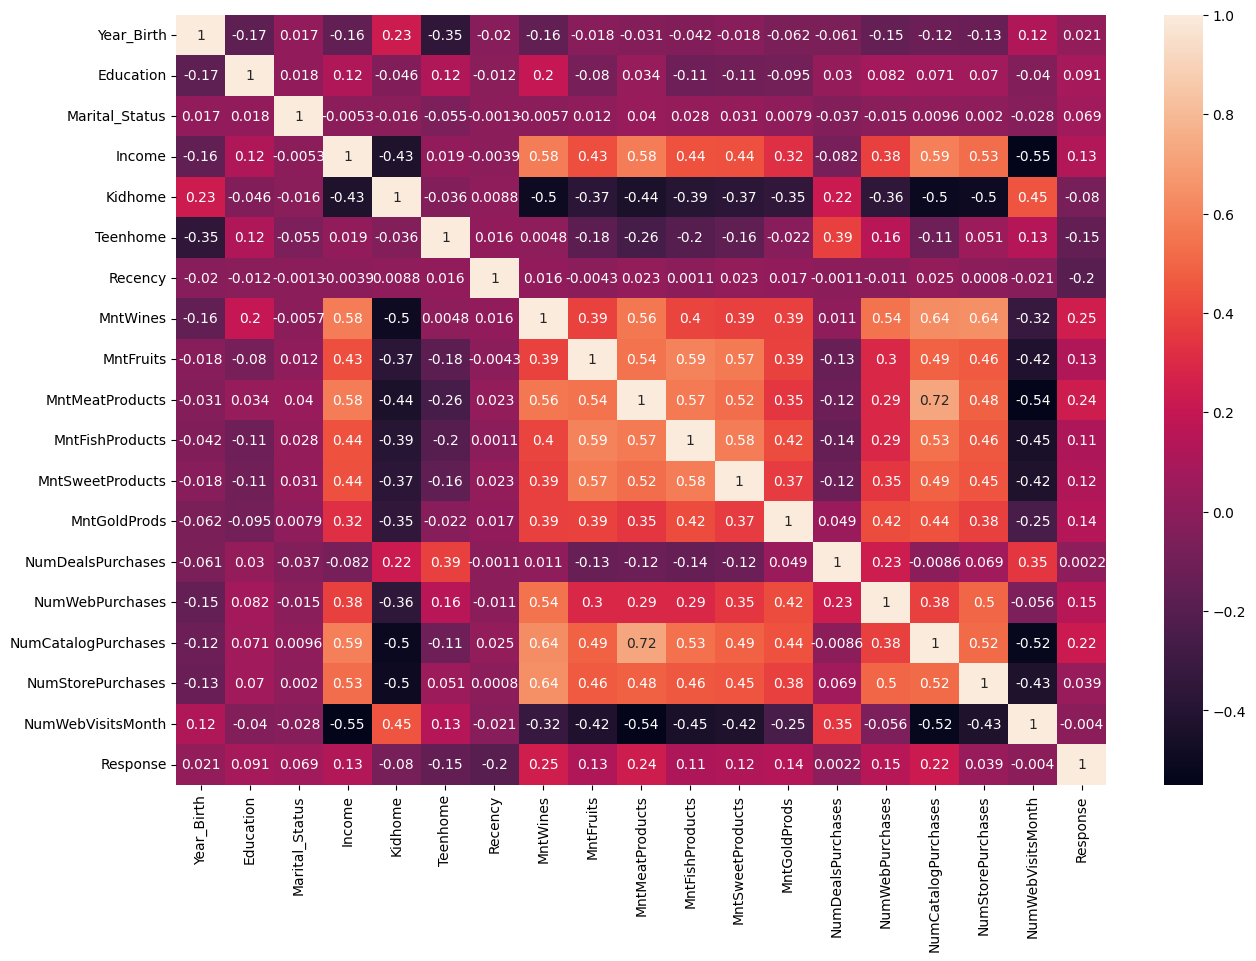

In [172]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)